## Homework 6 


Name: Dan Jang

Comments for instructor/grader:


### Exercise 6.3 LU Decomposition

[If you haven't already completed in HW5]

This exercise invites you to write your own
program to solve simultaneous equations using the method of LU
decomposition.

**a)** Starting, if you wish, with the program for Gaussian elimination in
  Example 6.1 on page 218, write a Python function that calculates the LU
  decomposition of a matrix.  The calculation is same as that for Gaussian
  elimination, except that at each step of the calculation you need to
  extract the appropriate elements of the matrix and assemble them to form
  the lower diagonal matrix __L__ of Eq. (6.32).  Test your function by
  calculating the LU decomposition of the matrix from Eq. (6.2), then
  multiplying the __L__ and __U__ you get and verifying that you
  recover the original matrix once more.

In [4]:
## PH 322 - Q6.3a
## Gaussian Elimination Code (from gausselim.py of textbook)

from numpy import array,empty
import numpy as np

A = array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = array([ -4, 3, 9, 7 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print("Gaussian Elimination: " + str(x))

## LU Decomposition function
## Credits: ChatGPT for numpy implementation

def lu_decomposition(A):
    # Get the dimensions of the input matrix
    n = len(A)

    # Initialize the L and U matrices
    L = np.identity(n)
    U = np.zeros((n, n))

    # Perform LU decomposition
    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - sum(L[i, k] * U[k, j] for k in range(i))
        
        for j in range(i + 1, n):
            L[j, i] = (A[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]

    return L, U

# Test the function
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)

L, U = lu_decomposition(A)
print("LU Decomposition: ")
print("L:\n", L)
print("U:\n", U)
print("A:\n", np.dot(L, U))

Gaussian Elimination: [ 2. -1. -2.  1.]
LU Decomposition: 
L:
 [[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
U:
 [[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]
A:
 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]


**Pts /10**

**b)** Build on your LU decomposition function to create a complete program
  to solve Eq. (6.2) by performing a double substitution as described
  in this section. 

In [6]:
## PH 322 - Q6.3b
## Gaussian Elimination Code (from gausselim.py of textbook)

from numpy import array,empty
import numpy as np

A = array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = array([ -4, 3, 9, 7 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print("Gaussian Elimination: " + str(x))

## LU Decomposition function
## Credits: ChatGPT for numpy implementation

def lu_decomposition(A, b):
    # Get the dimensions of the input matrix
    n = len(A)

    # Initialize the L and U matrices
    L = np.identity(n)
    U = np.zeros((n, n))

    # Perform LU decomposition
    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - sum(L[i, k] * U[k, j] for k in range(i))
        
        for j in range(i + 1, n):
            L[j, i] = (A[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]

    # Forward substitution
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - sum(L[i, j] * y[j] for j in range(i))

    # Backward substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(U[i, j] * x[j] for j in range(i + 1, n))) / U[i, i]

    return L, U, x

# Test the function
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)
b = np.array([-4, 3, 9, 7], float)

L, U, x = lu_decomposition(A, b)
print("LU Decomposition: ")
print("L:\n", L)
print("U:\n", U)
print("x:\n", x)

Gaussian Elimination: [ 2. -1. -2.  1.]
LU Decomposition: 
L:
 [[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
U:
 [[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]
x:
 [ 2. -1. -2.  1.]


**Pts /10**

**c)**  Solve the same equations using the function _solve_ from the _numpy_ package and verify that you get the same answer either way.

In [7]:
## PH 322 - Q6.3c
## Gaussian Elimination Code (from gausselim.py of textbook)

from numpy import array,empty
import numpy as np

A = array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]],float)
v = array([ -4, 3, 9, 7 ],float)
N = len(v)

# Gaussian elimination
for m in range(N):

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print("Gaussian Elimination: " + str(x))

## LU Decomposition function
## Credits: ChatGPT for numpy implementation

def lu_decomposition(A, b):
    # Get the dimensions of the input matrix
    n = len(A)

    # Initialize the L and U matrices
    L = np.identity(n)
    U = np.zeros((n, n))

    # Perform LU decomposition
    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - sum(L[i, k] * U[k, j] for k in range(i))
        
        for j in range(i + 1, n):
            L[j, i] = (A[j, i] - sum(L[j, k] * U[k, i] for k in range(i))) / U[i, i]

    # Forward substitution
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - sum(L[i, j] * y[j] for j in range(i))

    # Backward substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum(U[i, j] * x[j] for j in range(i + 1, n))) / U[i, i]

    return L, U, x

# Test the function
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)
b = np.array([-4, 3, 9, 7], float)

L, U, x = lu_decomposition(A, b)
print("LU Decomposition: ")
print("L:\n", L)
print("U:\n", U)
print("x:\n", x)

### Part C, test with numpy's solve

# Define the input matrix A and vector b
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)
b = np.array([-4, 3, 9, 7], float)

# Solve the linear system using the custom LU decomposition function
L, U, x_custom = lu_decomposition(A, b)

# Solve the linear system using numpy.linalg.solve
x_numpy = np.linalg.solve(A, b)

# Compare the solutions
print("Custom LU decomposition solution:\n", x_custom)
print("Numpy solve solution:\n", x_numpy)
print("Are the solutions equal? ", np.allclose(x_custom, x_numpy))

Gaussian Elimination: [ 2. -1. -2.  1.]
LU Decomposition: 
L:
 [[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
U:
 [[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]
x:
 [ 2. -1. -2.  1.]
Custom LU decomposition solution:
 [ 2. -1. -2.  1.]
Numpy solve solution:
 [ 2. -1. -2.  1.]
Are the solutions equal?  True


**Pts /5**

**Total Exercise Pts /25**

### Exercise 6.8 QR algorithm

In this exercise you'll write a
program to calculate the eigenvalues and eigenvectors of a real symmetric
matrix using the QR algorithm.  The first challenge is to write a program
that finds the QR decomposition of a matrix.  Then we'll use that
decomposition to find the eigenvalues.

The details of this problem are quite long so refer to the write-up for the exercise in the textbook.

**b)** Write a Python function that takes as its argument a real square
  matrix __A__ and returns the two matrices __Q__ and __R__
  that form its QR decomposition.  As a test case, try out your function on
  the matrix:
  
  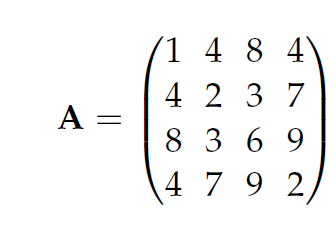
  
  Print out __Q__ and __A__. Check your code by multiplying and printing the product __Q__ __R__ to
recover the original matrix __A__. You can use the numpy function *np.dot()* to perform the matrix multiplication. 

In [9]:
## PH 322 - Q6.3b
## Credits: ChatGPT for numpy implementation

import numpy as np

def qr_decomposition(A):
    n = A.shape[1]
    Q = np.zeros(A.shape)
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j - 1):
            R[i, j] = Q[:, i].T @ A[:, j]
            v = v - (R[i, j] * Q[:, i])

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Test the function
A = np.array([[1, 4, 8, 4],
              [4, 2, 3, 7],
              [8, 3, 6, 9],
              [4, 7, 9, 2]], float)

Q, R = qr_decomposition(A)
print("Q:\n", Q)
print("R:\n", R)

# Verify the decomposition by checking if A = QR
A_reconstructed = np.dot(Q, R)
print("A:\n", A)
print("QR (verification that Q*R = original A):\n", A_reconstructed)
print("Is A equal to QR?", np.allclose(A, A_reconstructed))

Q:
 [[ 0.10153462  0.45291081  0.78194637 -0.08360034]
 [ 0.40613847  0.22645541 -0.14545133  0.05893685]
 [ 0.81227693  0.33968311 -0.29090267 -0.31183484]
 [ 0.40613847  0.79259392  0.53177008 -0.94461445]]
R:
 [[ 9.8488578   0.         10.55960012 11.37187705]
 [ 0.          8.83176087  0.          8.03916694]
 [ 0.          0.          8.85973168  0.        ]
 [ 0.          0.          0.          9.51748256]]
A:
 [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]
QR (verification that Q*R = original A):
 [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]
Is A equal to QR? True


**Pts /10**

**c)** Using your function, write a complete program to calculate the
  eigenvalues and eigenvectors of a real symmetric matrix using the QR
  algorithm.  Continue the calculation until the magnitude of every
  off-diagonal element of the matrix is smaller than $10^{-6}$.  Test your
  program on the example matrix above.  You should find that the
  eigenvalues are $1$, $21$, $-3$, and$-8$. Print out the eigenvectors and eigenvalues.

In [14]:
## PH 322 - Q6.3c
## Credits: ChatGPT for numpy implementation

import numpy as np

def qr_decomposition(A):
    n = A.shape[1]
    Q = np.zeros(A.shape)
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - (R[i, j] * Q[:, i])

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

def qr_algorithm(A, tol=1e-6, max_iter=1000):
    n = A.shape[0]
    V = np.identity(n)

    def off_diagonal_elements(matrix):
        return np.abs(matrix - np.diag(np.diagonal(matrix)))

    # Perform QR iteration
    for _ in range(max_iter):
        Q, R = qr_decomposition(A)
        A = np.dot(R, Q)
        V = np.dot(V, Q)

        if np.all(off_diagonal_elements(A) < tol):
            break

    # Extract the eigenvalues and eigenvectors
    eigenvalues = np.diagonal(A)
    eigenvectors = V

    return eigenvalues, eigenvectors

# Part C., Test the function
A = np.array([[1, 4, 8, 4],
              [4, 2, 3, 7],
              [8, 3, 6, 9],
              [4, 7, 9, 2]], float)

eigenvalues, eigenvectors = qr_algorithm(A)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Verify the decomposition by checking if A * v = lambda * v for each eigenvector v and eigenvalue lambda
for i in range(len(eigenvalues)):
    Av = np.dot(A, eigenvectors[:, i])
    lv = eigenvalues[i] * eigenvectors[:, i]
    print(f"Is A * v{i} equal to lambda{i} * v{i}?", np.allclose(Av, lv, atol=1e-6))

Eigenvalues:
 [21. -8. -3.  1.]
Eigenvectors:
 [[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]
Is A * v0 equal to lambda0 * v0? True
Is A * v1 equal to lambda1 * v1? True
Is A * v2 equal to lambda2 * v2? True
Is A * v3 equal to lambda3 * v3? True


**Pts /10**

**d)** Verify that your eigenvalues and eigenvectors satisfy the eigenvector equation:

$
\mathbf{A}{v}=\lambda\mathbf{v}
$

by computing and printing both sides of the equation. 

In [17]:
## PH 322 - Q6.3d
## Credits: ChatGPT for numpy implementation

import numpy as np

def qr_decomposition(A):
    n = A.shape[1]
    Q = np.zeros(A.shape)
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - (R[i, j] * Q[:, i])

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

def qr_algorithm(A, tol=1e-6, max_iter=1000):
    n = A.shape[0]
    V = np.identity(n)

    def off_diagonal_elements(matrix):
        return np.abs(matrix - np.diag(np.diagonal(matrix)))

    # Perform QR iteration
    for _ in range(max_iter):
        Q, R = qr_decomposition(A)
        A = np.dot(R, Q)
        V = np.dot(V, Q)

        if np.all(off_diagonal_elements(A) < tol):
            break

    # Extract the eigenvalues and eigenvectors
    eigenvalues = np.diagonal(A)
    eigenvectors = V

    return eigenvalues, eigenvectors
    
# Part D., Test the Eigenvalue/vector functions specifically
A = np.array([[1, 4, 8, 4],
              [4, 2, 3, 7],
              [8, 3, 6, 9],
              [4, 7, 9, 2]], float)

eigenvalues, eigenvectors = qr_algorithm(A)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Verify the decomposition by checking if A * v = lambda * v for each eigenvector v and eigenvalue lambda
for i in range(len(eigenvalues)):
    Av = np.dot(A, eigenvectors[:, i])
    lv = eigenvalues[i] * eigenvectors[:, i]
    print(f"\nEigenvector v{i}:")
    print("A * v{i}:\n", Av)
    print(f"lambda{i} * v{i}:\n", lv)
    print(f"Is A * v{i} equal to lambda{i} * v{i}?", np.allclose(Av, lv, atol=1e-6))

Eigenvalues:
 [21. -8. -3.  1.]
Eigenvectors:
 [[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]

Eigenvector v0:
A * v{i}:
 [ 9.06185632  8.05498355 13.08934824 11.07560214]
lambda0 * v0:
 [ 9.0618566   8.05498323 13.08934785 11.0756026 ]
Is A * v0 equal to lambda0 * v0? True

Eigenvector v1:
A * v{i}:
 [ 3.06856539 -3.45213556 -4.21927673  4.9864186 ]
lambda1 * v1:
 [ 3.06856512 -3.45213582 -4.2192772   4.98641818]
Is A * v1 equal to lambda1 * v1? True

Eigenvector v2:
A * v{i}:
 [ 2.32378997  0.77459671 -0.77459662 -1.5491934 ]
lambda2 * v2:
 [ 2.32378999  0.7745967  -0.77459666 -1.54919336]
Is A * v2 equal to lambda2 * v2? True

Eigenvector v3:
A * v{i}:
 [-0.25819888  0.77459667 -0.51639778  0.25819888]
lambda3 * v3:
 [-0.25819889  0.77459667 -0.51639778  0.25819889]
Is A * v3 equal to lambda3 * v3? True


**Pts /5**

**e)** Verify  your eigenvectors and eigenvalues again, this time using the  *numpy.linalg* function *eigh()*. Refer to its online documentation https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
Print out compare the eigenvectors and eigenvalues you calculated with your algorithm and with *eigh()*.

In [19]:
## PH 322 - Q6.3d
## Credits: ChatGPT for numpy implementation

import numpy as np

def qr_decomposition(A):
    n = A.shape[1]
    Q = np.zeros(A.shape)
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - (R[i, j] * Q[:, i])

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

def qr_algorithm(A, tol=1e-6, max_iter=1000):
    n = A.shape[0]
    V = np.identity(n)

    def off_diagonal_elements(matrix):
        return np.abs(matrix - np.diag(np.diagonal(matrix)))

    # Perform QR iteration
    for _ in range(max_iter):
        Q, R = qr_decomposition(A)
        A = np.dot(R, Q)
        V = np.dot(V, Q)

        if np.all(off_diagonal_elements(A) < tol):
            break

    # Extract the eigenvalues and eigenvectors
    eigenvalues = np.diagonal(A)
    eigenvectors = V

    return eigenvalues, eigenvectors

# Part E., Test the Eigenvalue/vector functions specifically with numpy.linalg.eigh
A = np.array([[1, 4, 8, 4],
              [4, 2, 3, 7],
              [8, 3, 6, 9],
              [4, 7, 9, 2]], float)

# Calculate eigenvalues and eigenvectors using QR algorithm
eigenvalues_qr, eigenvectors_qr = qr_algorithm(A)

# Calculate eigenvalues and eigenvectors using numpy.linalg.eigh
eigenvalues_np, eigenvectors_np = np.linalg.eigh(A)

# Sort eigenvalues and eigenvectors in ascending order
sorted_indices_qr = np.argsort(eigenvalues_qr)
sorted_indices_np = np.argsort(eigenvalues_np)

eigenvalues_qr = eigenvalues_qr[sorted_indices_qr]
eigenvectors_qr = eigenvectors_qr[:, sorted_indices_qr]

eigenvalues_np = eigenvalues_np[sorted_indices_np]
eigenvectors_np = eigenvectors_np[:, sorted_indices_np]

# Compare the results
print("QR algorithm eigenvalues:\n", eigenvalues_qr)
print("Numpy eigh() eigenvalues:\n", eigenvalues_np)
print("Are the eigenvalues equal? ", np.allclose(eigenvalues_qr, eigenvalues_np, atol=1e-6))

print("\nQR algorithm eigenvectors:\n", eigenvectors_qr)
print("Numpy eigh() eigenvectors:\n", eigenvectors_np)
print("Are the eigenvectors equal? ", np.allclose(np.abs(eigenvectors_qr), np.abs(eigenvectors_np), atol=1e-6))

QR algorithm eigenvalues:
 [-8. -3.  1. 21.]
Numpy eigh() eigenvalues:
 [-8. -3.  1. 21.]
Are the eigenvalues equal?  True

QR algorithm eigenvectors:
 [[-0.38357064 -0.77459666 -0.25819889  0.43151698]
 [ 0.43151698 -0.2581989   0.77459667  0.38357063]
 [ 0.52740965  0.25819889 -0.51639778  0.62330228]
 [-0.62330227  0.51639779  0.25819889  0.52740965]]
Numpy eigh() eigenvectors:
 [[-0.38357064 -0.77459667  0.25819889 -0.43151697]
 [ 0.43151697 -0.25819889 -0.77459667 -0.38357064]
 [ 0.52740963  0.25819889  0.51639778 -0.62330229]
 [-0.62330229  0.51639778 -0.25819889 -0.52740963]]
Are the eigenvectors equal?  True


**Pts /5**

**Total Exercise Pts /30**

### Exercise 6.10 Relaxation method

Consider the equation $x = 1 − e^{−cx}$, where $c$ is a known parameter and $x$ is
unknown. This equation arises in a variety of situations, including the physics of contact processes,
mathematical models of epidemics, and the theory of random graphs.

a) Write a program to solve this equation for $x$ using the relaxation method for the case
$c = 2$. Calculate your solution to an accuracy of at least $10^{−6}$.

In [25]:
### PH 322 - Q6.10a
## Credits: ChatGPT for math implementation

import math

def g(x, c):
    return 1 - math.exp(-c * x)

def relaxation_method(c, accuracy=1e-6):
    x_old = 0.5
    x_new = g(x_old, c)
    
    while abs(x_new - x_old) > accuracy:
        x_old = x_new
        x_new = g(x_old, c)
        
    return x_new

c = 2
accuracy = 1e-6
x = relaxation_method(c, accuracy)

print(f"The solution for x with c = " + str(c) + " and with an accuracy of " + str(accuracy) + " is x = " + str(x))

The solution for x with c = 2 and with an accuracy of 1e-06 is x = 0.7968118244957711


**/5 pts**

Modify your program to calculate the solution for values of $c$ from $0$ to $3$ in steps of $0.01$
and make a plot of $x$ as a function of $c$. You should see a clear transition from a regime
in which $x = 0$ to a regime of nonzero $x$. This is another example of a phase transition.
In physics this transition is known as the percolation transition; in epidemiology it is the
epidemic threshold.

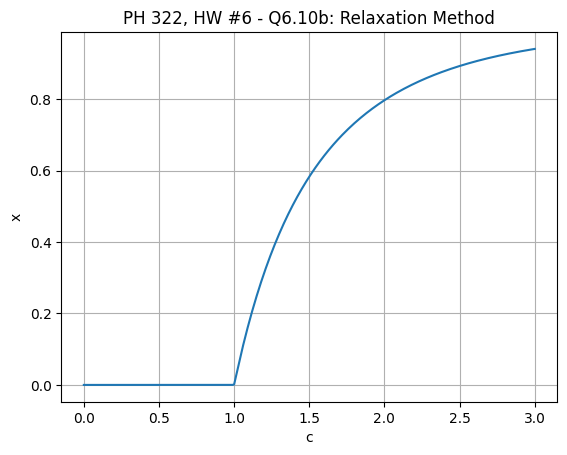

In [26]:
### PH 322 - Q6.10b
## Credits: ChatGPT for math & matplotlib implementation

import math
import numpy as np
import matplotlib.pyplot as plt

def g(x, c):
    return 1 - math.exp(-c * x)

def relaxation_method(c, accuracy=1e-6):
    x_old = 0.5
    x_new = g(x_old, c)
    
    while abs(x_new - x_old) > accuracy:
        x_old = x_new
        x_new = g(x_old, c)
        
    return x_new

c_values = np.arange(0, 3.01, 0.01)
x_values = [relaxation_method(c) for c in c_values]

plt.plot(c_values, x_values)
plt.xlabel('c')
plt.ylabel('x')
plt.title('PH 322, HW #6 - Q6.10b: Relaxation Method')
plt.grid(True)
plt.show()

**/5 pts**

**Total /10 pts**

### Total HW Pts /65